In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
bone = pd.read_csv('Implementation\LabelledData\Bone-Cancer.csv')
bone_cancer = bone[bone['Label'] == 1]['Name']


In [3]:
breast = pd.read_csv('Implementation\LabelledData\Breast-Cancer.csv')
breast_cancer = breast[breast['Label'] == 1]['Name']


In [4]:
colon = pd.read_csv('Implementation\LabelledData\Colon-Cancer.csv')
colon_cancer = colon[colon['Label'] == 1]['Name']


In [5]:
kidney = pd.read_csv('Implementation\LabelledData\Kidney-Cancer.csv')
kidney_cancer = kidney[kidney['Label'] == 1]['Name']


In [6]:
liver = pd.read_csv('Implementation\LabelledData\Liver-Cancer.csv')
liver_cancer = liver[liver['Label'] == 1]['Name']


In [7]:
bone_protein = set(np.unique(bone_cancer))
breast_protein = set(np.unique(breast_cancer))
colon_protein = set(np.unique(colon_cancer))
kidney_protein = set(np.unique(kidney_cancer))
liver_protein = set(np.unique(liver_cancer))
len(bone_protein), len(breast_protein), len(colon_protein), len(kidney_protein), len(liver_protein)


(39, 92, 84, 70, 86)

In [8]:
len(bone_protein.intersection(breast_protein,
    colon_protein, kidney_protein, liver_protein))


25

In [9]:
common_proteins = list(bone_protein.intersection(
    breast_protein, colon_protein, kidney_protein, liver_protein))
common_proteins


['CCND1',
 'CDK4',
 'TGFB1',
 'TP53',
 'RELA',
 'CDC42',
 'HRAS',
 'MET',
 'CDKN1A',
 'CCNA2',
 'CTNNB1',
 'ENG',
 'CD44',
 'STAT3',
 'HDAC1',
 'TGFBR2',
 'RHOA',
 'FOS',
 'SMAD3',
 'CAV1',
 'CCNB1',
 'AKT1',
 'PTK2',
 'ERBB2',
 'CASP3']

In [14]:
abs(colon[['Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Katz', 'ClusteringCoef']])

,Betweenness,Degree,Closeness,EigenValueC,Katz,ClusteringCoef
0,0.001283,0.010909,0.333131,0.004064,0.031076,0.000000
1,0.012507,0.065455,0.411985,0.046915,0.136670,0.098413
2,0.008457,0.047273,0.400000,0.027690,0.014079,0.138462
3,0.002207,0.012727,0.328554,0.002846,0.021978,0.000000
4,0.017024,0.063636,0.418569,0.031045,0.015647,0.112605
...,...,...,...,...,...,...
546,0.000038,0.009091,0.334957,0.004155,0.036271,0.600000
547,0.000111,0.005455,0.295064,0.000913,0.014602,0.333333
548,0.002033,0.027273,0.366422,0.044390,0.035122,0.542857
549,0.001118,0.005455,0.330529,0.004918,0.006127,0.000000


In [15]:
def plotProteinVals(bone, breast, colon, kidney, liver, protein_name):
    protein = pd.DataFrame(columns=[
                           'Type', 'Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Katz', 'ClusteringCoef'])

    truth_value = []
    for i in range(len(bone)):
        truth_value.append(list(bone['Name'])[i] in common_proteins)
    protein = protein.append(abs(bone[truth_value][bone[truth_value]['Name'] == protein_name][[
                             'Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Katz', 'ClusteringCoef']]), ignore_index=True)
    protein.loc[0, 'Type'] = 'Bone'

    truth_value = []
    for i in range(len(breast)):
        truth_value.append(list(breast['Name'])[i] in common_proteins)
    protein = protein.append(abs(breast[truth_value][breast[truth_value]['Name'] == protein_name][[
                             'Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Katz', 'ClusteringCoef']]), ignore_index=True)
    protein.loc[1, 'Type'] = 'Breast'

    truth_value = []
    for i in range(len(colon)):
        truth_value.append(list(colon['Name'])[i] in common_proteins)
    protein = protein.append(abs(colon[truth_value][colon[truth_value]['Name'] == protein_name][[
                             'Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Katz', 'ClusteringCoef']]), ignore_index=True)
    protein.loc[2, 'Type'] = 'Colon'

    truth_value = []
    for i in range(len(kidney)):
        truth_value.append(list(kidney['Name'])[i] in common_proteins)
    protein = protein.append(abs(kidney[truth_value][kidney[truth_value]['Name'] == protein_name][[
                             'Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Katz', 'ClusteringCoef']]), ignore_index=True)
    protein.loc[3, 'Type'] = 'Kidney'

    truth_value = []
    for i in range(len(liver)):
        truth_value.append(list(liver['Name'])[i] in common_proteins)
    protein = protein.append(abs(liver[truth_value][liver[truth_value]['Name'] == protein_name][[
                             'Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Katz', 'ClusteringCoef']]), ignore_index=True)
    protein.loc[4, 'Type'] = 'Liver'

    print(protein)

    protein.plot(x='Type', y=['Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Katz',
                 'ClusteringCoef'], kind='bar', figsize=[10, 8], colormap='Set3', title=protein_name)
    plt.show()
    protein.plot(x='Type', y=['Betweenness'], kind='bar', figsize=[
                 10, 8], colormap='Set3', title='Betweenness for '+protein_name)
    plt.show()
    protein.plot(x='Type', y=['Degree'], kind='bar', figsize=[
                 10, 8], colormap='Set3', title='Degree for '+protein_name)
    plt.show()
    protein.plot(x='Type', y=['Closeness'], kind='bar', figsize=[
                 10, 8], colormap='Set3', title='Closeness for '+protein_name)
    plt.show()
    protein.plot(x='Type', y=['EigenValueC'], kind='bar', figsize=[
                 10, 8], colormap='Set3', title='Eigenvalue Clustering for '+protein_name)
    plt.show()
    protein.plot(x='Type', y=['Katz'], kind='bar', figsize=[
                 10, 8], colormap='Set3', title='Katz Centrality for '+protein_name)
    plt.show()
    protein.plot(x='Type', y=['ClusteringCoef'], kind='bar', figsize=[
                 10, 8], colormap='Set3', title='Clustering Coefficient for '+protein_name)
    plt.show()


     Type  Betweenness    Degree  Closeness  EigenValueC      Katz  \
0    Bone     0.020517  0.074286   0.395480     0.060176  0.038186   
1  Breast     0.016232  0.068519   0.417957     0.041931  0.145357   
2   Colon     0.012507  0.065455   0.411985     0.046915  0.136670   
3  Kidney     0.010165  0.063265   0.399348     0.052081  0.044237   
4   Liver     0.013304  0.065079   0.405145     0.043014  0.004117   

   ClusteringCoef  
0        0.089231  
1        0.079580  
2        0.098413  
3        0.105376  
4        0.075610  


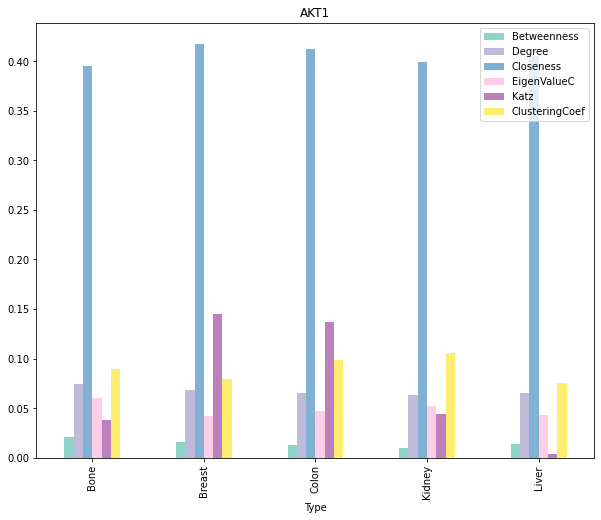

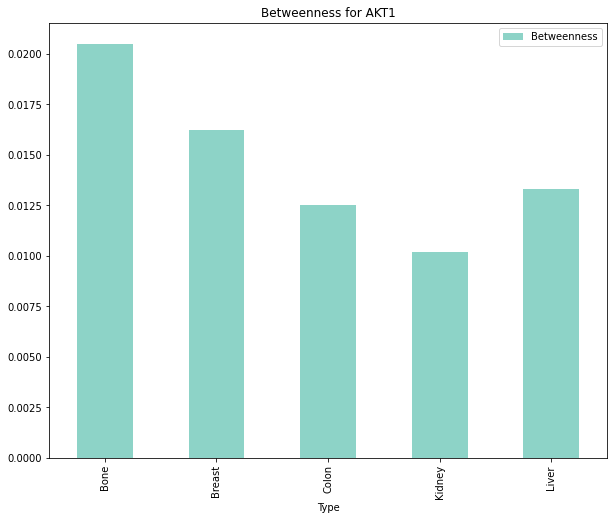

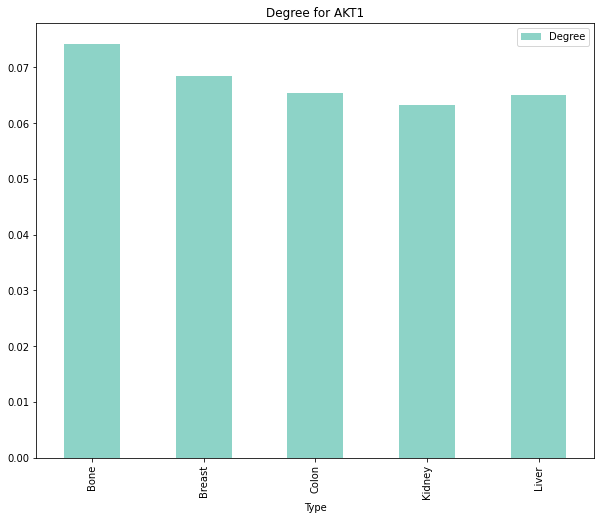

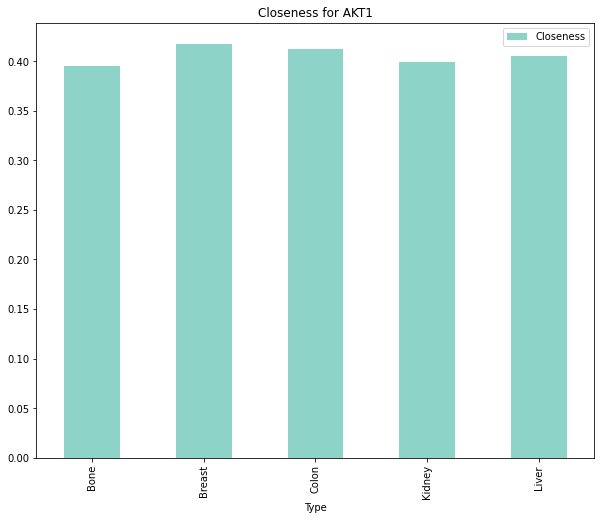

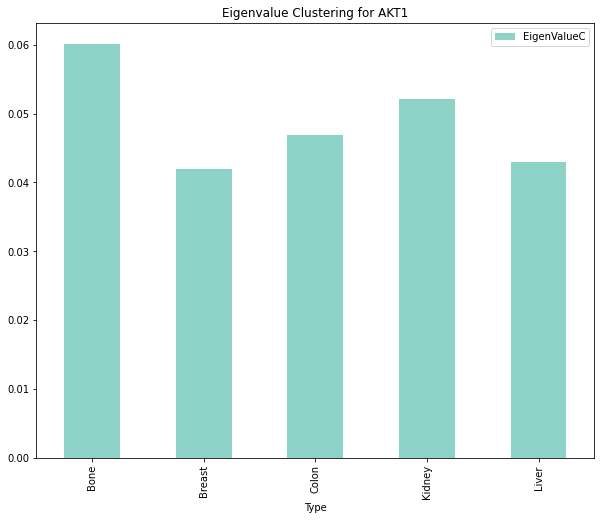

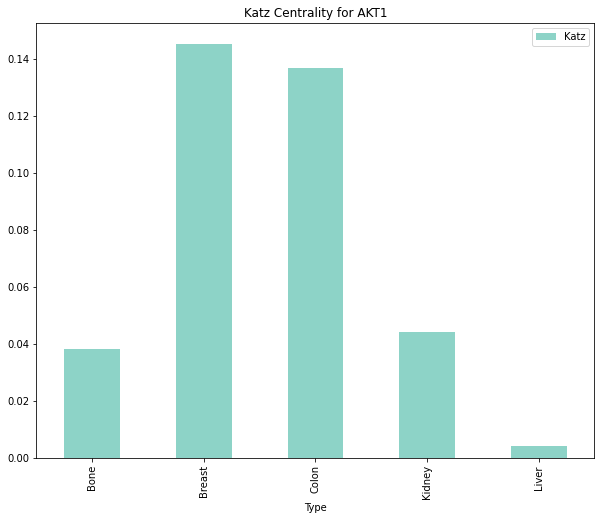

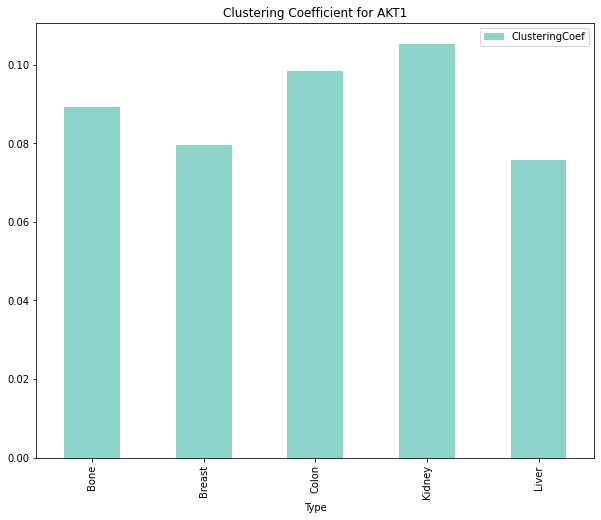

In [16]:
plotProteinVals(bone, breast, colon, kidney, liver, 'AKT1')


     Type  Betweenness    Degree  Closeness  EigenValueC      Katz  \
0    Bone     0.012563  0.048571   0.386740     0.027407  0.017079   
1  Breast     0.013908  0.055556   0.415704     0.031168  0.021385   
2   Colon     0.008457  0.047273   0.400000     0.027690  0.014079   
3  Kidney     0.012930  0.048980   0.395480     0.027562  0.057587   
4   Liver     0.011085  0.053968   0.403846     0.027885  0.166303   

   ClusteringCoef  
0        0.102941  
1        0.135632  
2        0.138462  
3        0.137681  
4        0.110517  


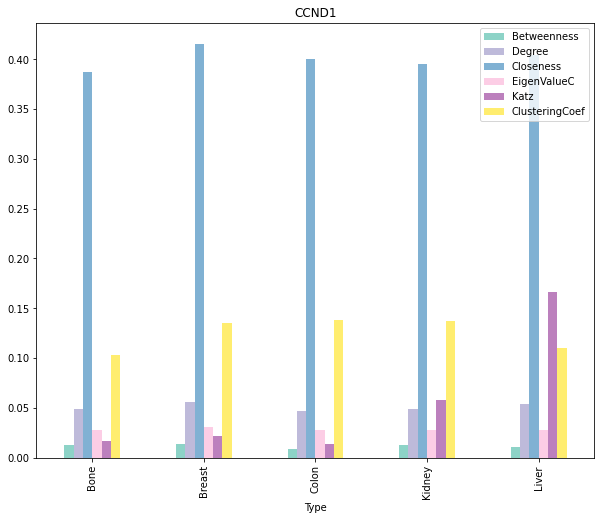

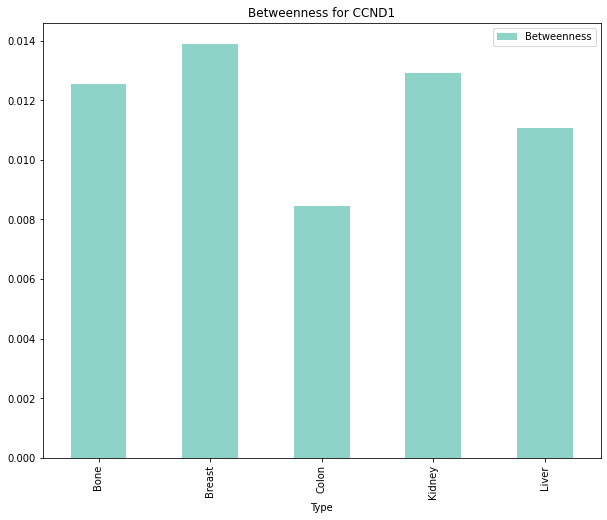

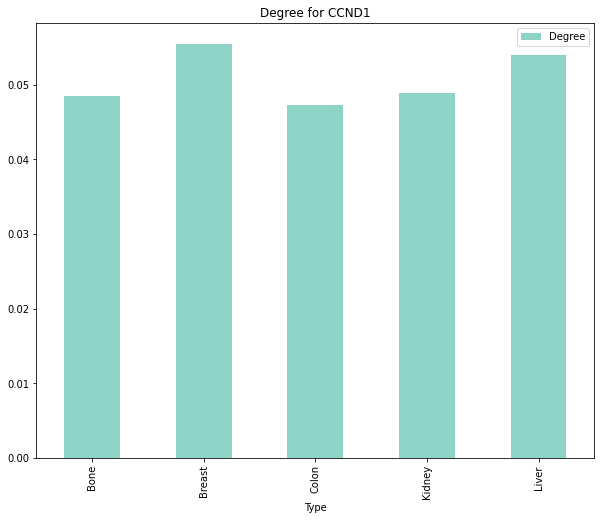

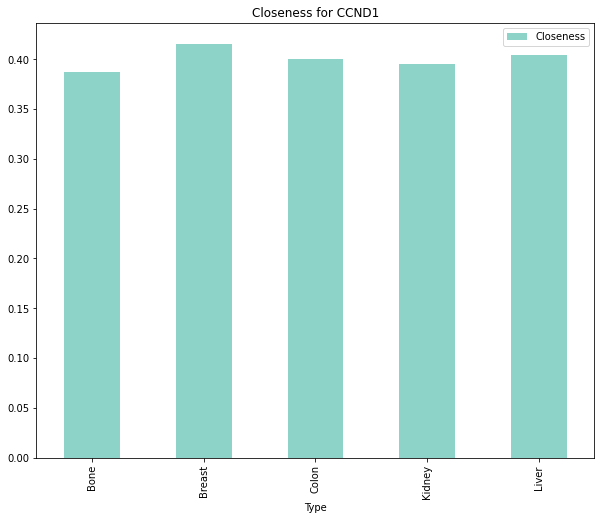

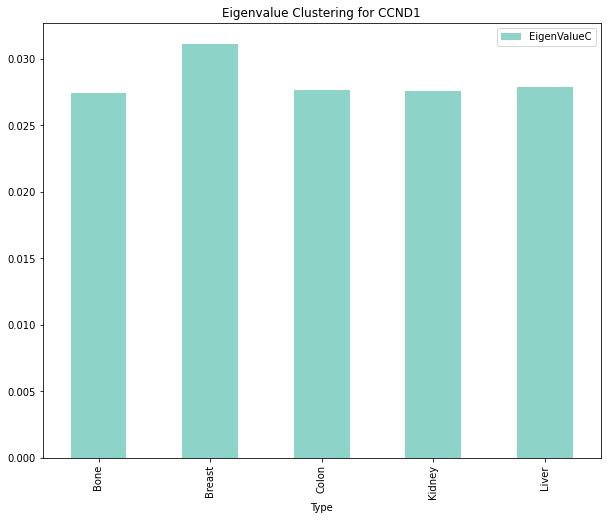

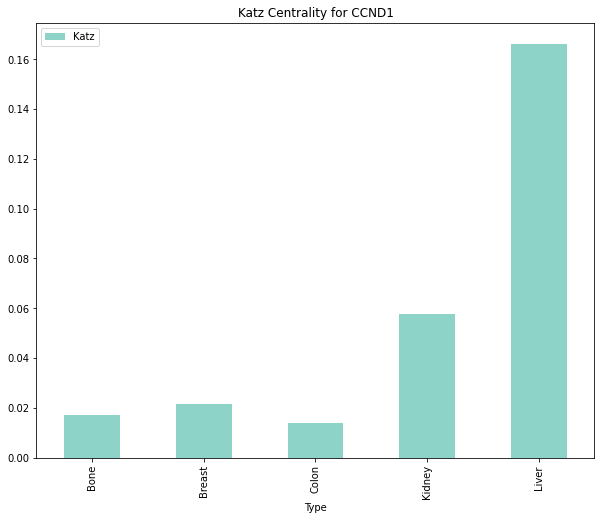

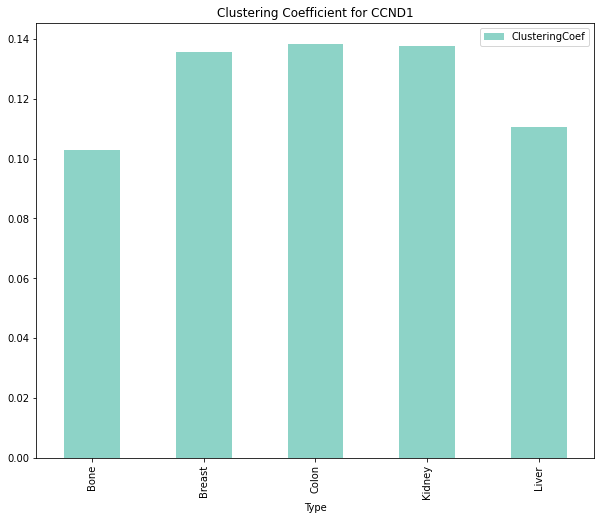

In [17]:
plotProteinVals(bone, breast, colon, kidney, liver, 'CCND1')
